The data context and description presented here were gathered by https://www.kaggle.com/code/faressayah/lending-club-loan-defaulters-prediction

## ⚡️Business Background and Objectives

San Francisco-based LendingClub offers peer-to-peer loans. It was the first peer-to-peer lender to register its loans as securities with the SEC and provide secondary market trading. The largest peer-to-peer lending platform is LendingClub.

We can learn how EDA and Machine Learning tackle actual business challenges by solving this case study. This case study will also teach us about risk analytics in banking and financial services and how data is utilized to reduce client loan risk.

In your role at LendingClub, you lend various loans to urban customers. The company must approve loan applications depending on the applicant's profile. The bank's decision carries two risks:

* If the applicant will repay the loan, not approving it costs the company business.
* If the applicant is likely to default, accepting the loan may cost the company money.

Data about past loan applicants and ‘defaulted’ status is provided. Identifying trends that indicate a person is likely to default can be used to deny the loan, reduce the amount, lend to risky applicants at a higher interest rate, etc.

When someone requests for a loan, the corporation may make two decisions:

* Accepted loan: If the corporation approves the loan, three situations are possible:
   - Fully paid: Applicant paid loan principle and interest.
   - Current: Applicant is paying instalments, thus loan tenure is not yet full. Such candidates are not 'defaulted'.
   - Charged-off: Applicant has defaulted on loan due to late payments.
* Loan rejected: The corporation denied the loan (because the candidate did not match conditions). The company does not have a transactional history of those applicants because the loan was declined, hence this data is not available.

LendingClub is the largest online loan marketplace for personal, commercial, and medical loans. Online interfaces allow borrowers to get lower-interest loans quickly. Like other lending organizations, lending to ‘risky’ candidates causes the highest credit loss. The lender loses credit when the borrower defaults or flees. Thus, lenders lose the most from defaulting borrowers. The 'charged-off' clients are the 'defaulters'.
If problematic loan applicants can be identified, credit loss can be reduced. This case study uses EDA and machine learning to identify such applications. Thus, the organization seeks to identify loan default drivers, or variables that strongly predict default. The corporation might use this knowledge for portfolio and risk evaluation.

## 📊 Data Describtion

| | Variable | Description|
| --- | --- | --- | 
| 0 | **loan_status** | Current status of the loan |
| 1 | loan_amnt | The listed amont of the loan applied for by the borrower | 
| 2 | term | The number of payments on the loan. Vlaues are in month |
| 3 | int_rate | Interest rate on the loan|
| 4 | installment | The monthly payment owed by the borrower if the loan orginates |
| 5 | grade | LC assigned loan grade |
| 8 | emp_length | Employment length in years|
| 9 | home_ownership | The home ownership status provided by the borrower during registration or obtained from the credit report |
| 10 | annual_inc | The self-reported annual income provided by the borrower during registration|
| 11 | verification_status| Indicates if income was verified by LC, not verfied, or if the income source was verified |
| 12 | purpose | A category provided by the borrower for the loan request ||
| 14 | addr_state | The state provide by the borrower in the loan application |
| 15 | dti | A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self-reported monthly income |
| 17 | open_acc | The number of open credit lines in the borrower's credit file |
| 18 | pub_rec | Number of derogatory public records|
| 19 | revol_util | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit |
| 20 | total_acc | The total number of credit lines currently in the borrower's credit file|
| 21 | initial_list_status | The initial listing status of the loan |
| 22 | application_type | Indicates whether the loan is individual application or joint application with two co-borrowers |
| 23 | mort_acc | Number of mortgage accounts |
| 24 | pub_rec_bankruptcies | number of public record bankrupticies |
| 25 | last_fico_range_low* | The lowest possible FICO credit score obtained during the most recent evaluation of a person's creditworthiness |
| 26 | last_fico_range_high* | The highest possible FICO credit score obtained during the most recent evaluation of a person's creditworthiness |
 
The goal variable in this study is the **loan_status**, which is classified as either "full paid" or "charge-off". Thus, this analysis is a binary classification problem.

## 💫 Data Wrangling

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

%run functions.ipynb

In [2]:
act = pd.read_csv("../Data/accepted_2007_to_2018Q4.csv")
act = pd.DataFrame(act)
act = act.iloc[:-2] # remove the last two row

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cat_cols = ["loan_status", "term", "grade","emp_length","home_ownership",
            "verification_status","purpose","addr_state","initial_list_status","application_type"]
num_cols = ["loan_amnt","int_rate","installment","annual_inc","dti","open_acc","pub_rec","revol_util","total_acc",
            "mort_acc","pub_rec_bankruptcies","last_fico_range_low","last_fico_range_high"]
cols = cat_cols + num_cols
data = act[cols]

In [4]:
# loan status either fully paid or charged off
data = data[(data["loan_status"]=="Fully Paid")|(data["loan_status"]=="Charged Off")]
data["loan_status"].value_counts()

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

### cross tables between categorical features and target

#### * term vs loan_status

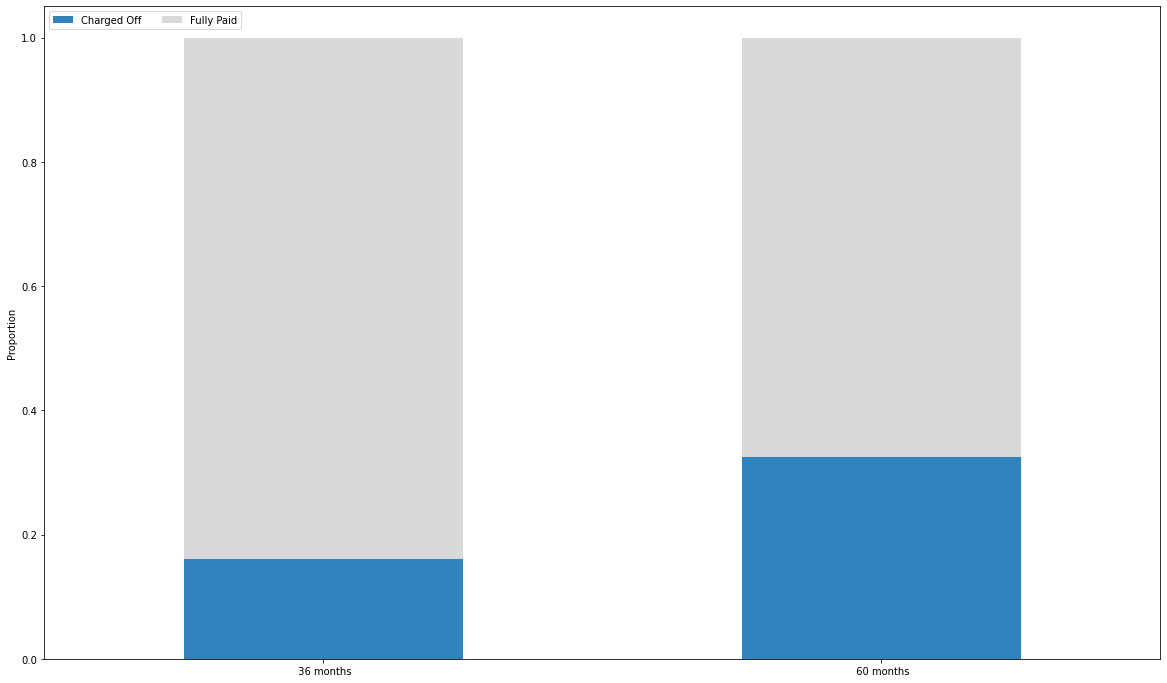

In [5]:
ct1 = pd.crosstab(index = data["term"], columns = data["loan_status"])
ctp1 = pd.crosstab(index = data["term"],columns = data["loan_status"], normalize = "index")
crosstable_visual_notext(ct1,ctp1)

#### * grade vs loan_status

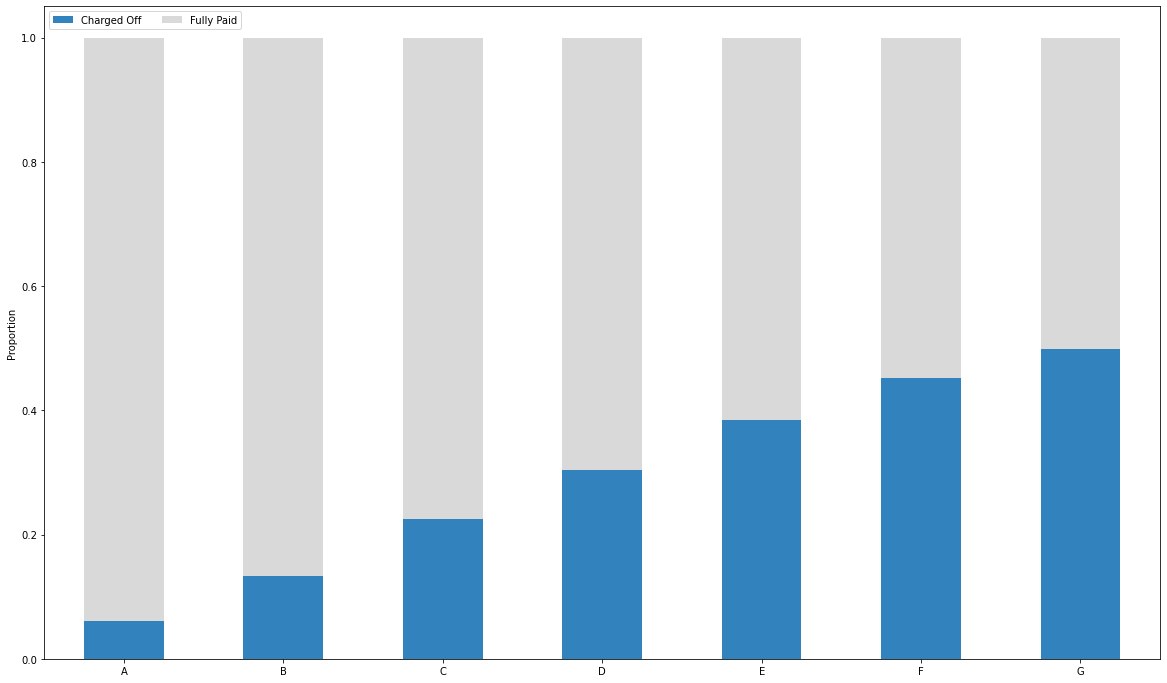

In [6]:
ct2 = pd.crosstab(index = data["grade"], columns = data["loan_status"])
ctp2 = pd.crosstab(index = data["grade"],columns = data["loan_status"], normalize = "index")
crosstable_visual_notext(ct2,ctp2)

#### * emp_length vs loan_status

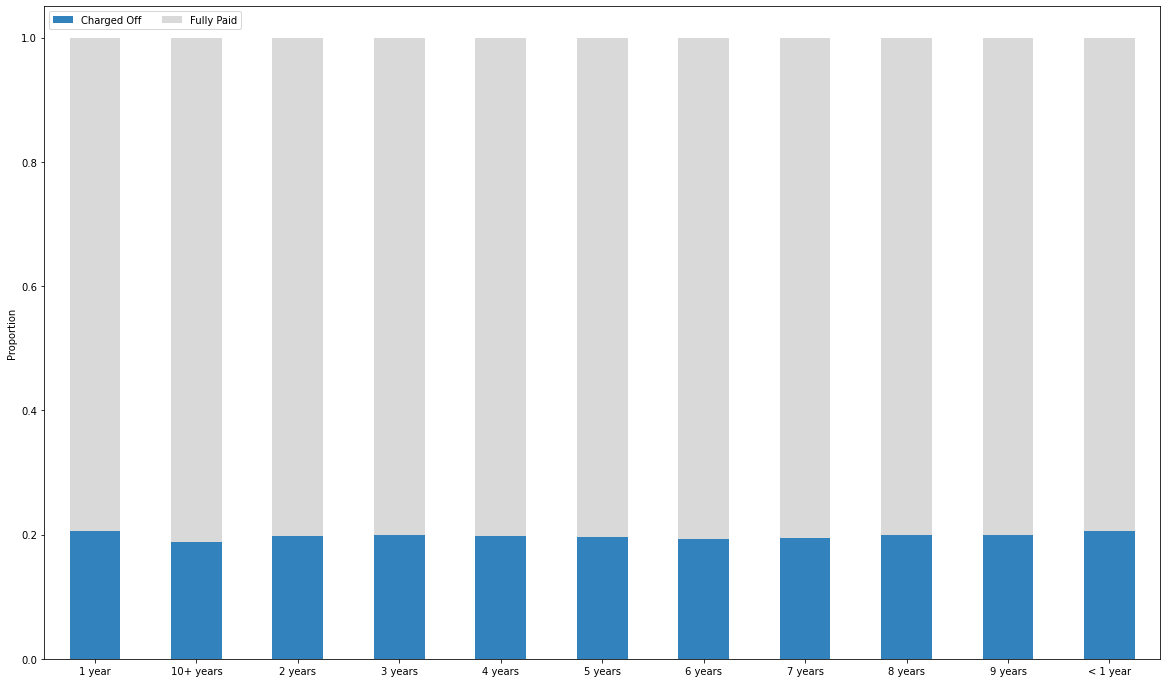

In [7]:
ct3 = pd.crosstab(index = data["emp_length"], columns = data["loan_status"])
ctp3 = pd.crosstab(index = data["emp_length"],columns = data["loan_status"], normalize = "index")
crosstable_visual_notext(ct3,ctp3)

#### * home_ownership vs loan_status

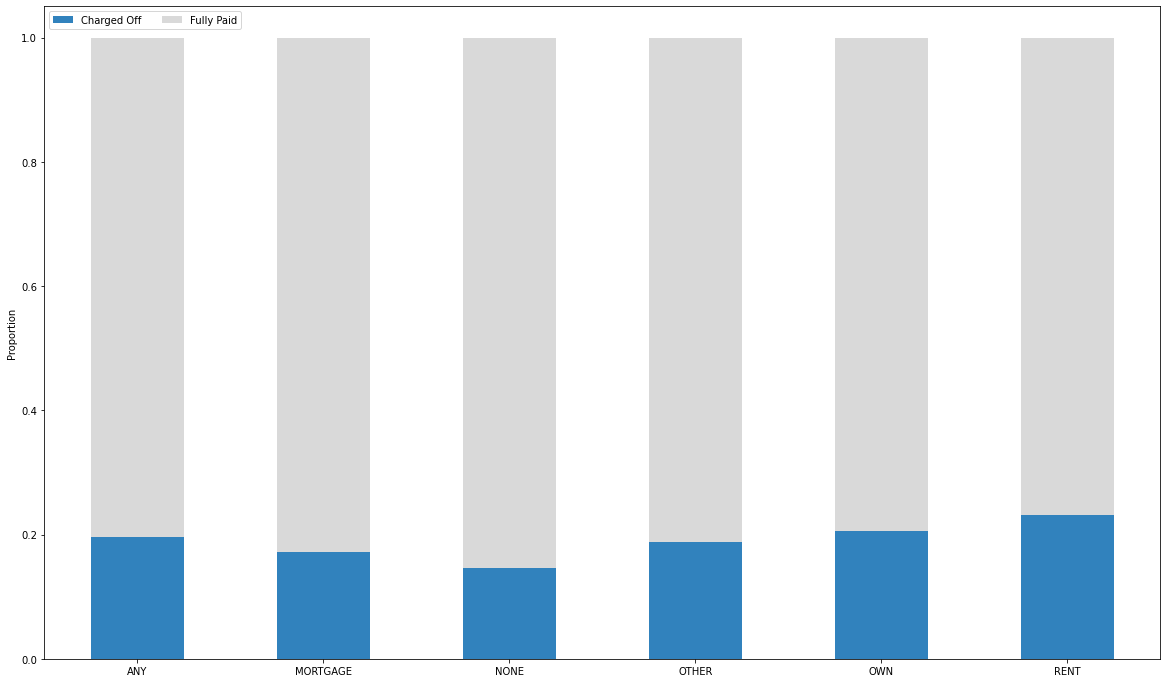

In [8]:
ct4 = pd.crosstab(index = data["home_ownership"], columns = data["loan_status"])
ctp4 = pd.crosstab(index = data["home_ownership"],columns = data["loan_status"], normalize = "index")
crosstable_visual_notext(ct4,ctp4)

In [9]:
data = data[data["home_ownership"]!="NONE"] # drop rows with home_ownership unknown

#### * verification_status vs loan_status

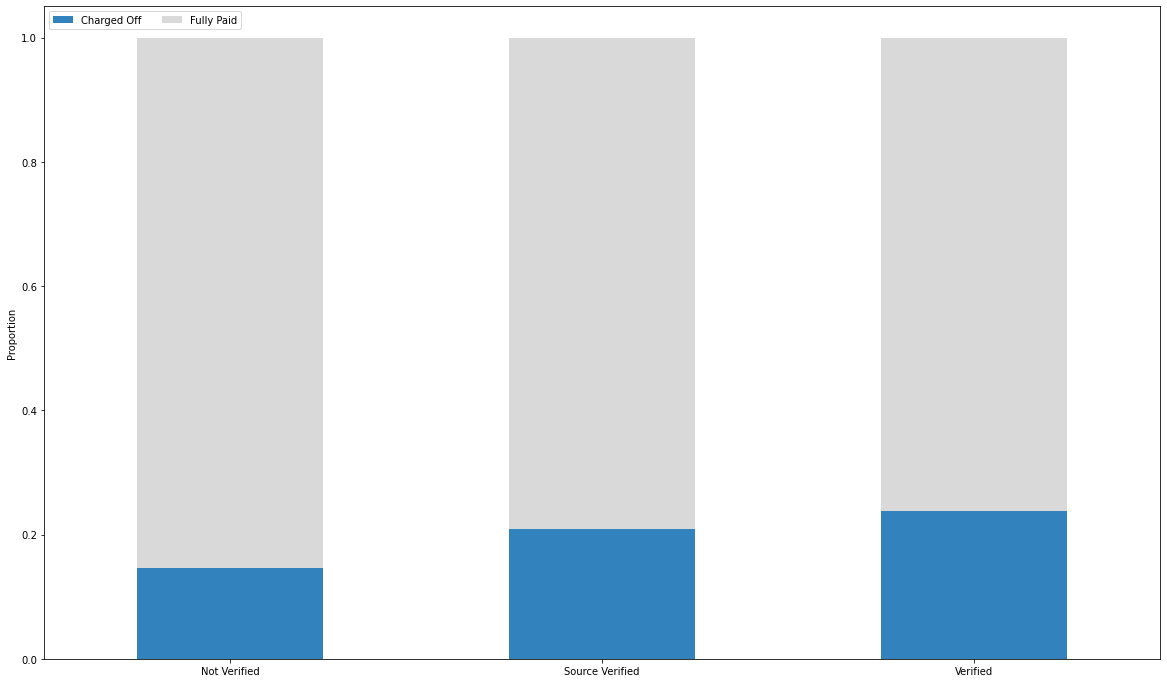

In [10]:
ct5 = pd.crosstab(index = data["verification_status"], columns = data["loan_status"])
ctp5 = pd.crosstab(index = data["verification_status"],columns = data["loan_status"], normalize = "index")
crosstable_visual_notext(ct5,ctp5)

#### * purpose vs loan_status


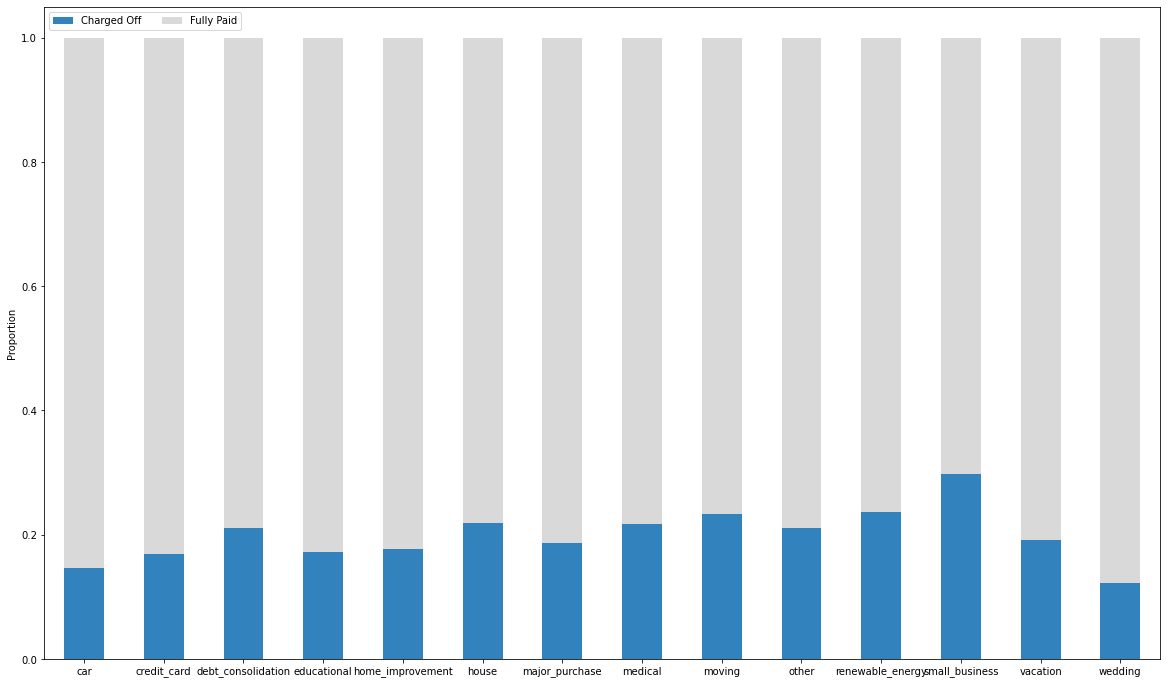

In [11]:
ct6 = pd.crosstab(index = data["purpose"], columns = data["loan_status"])
ctp6 = pd.crosstab(index = data["purpose"],columns = data["loan_status"], normalize = "index")
crosstable_visual_notext(ct6,ctp6)

#### addr_state vs loan_status

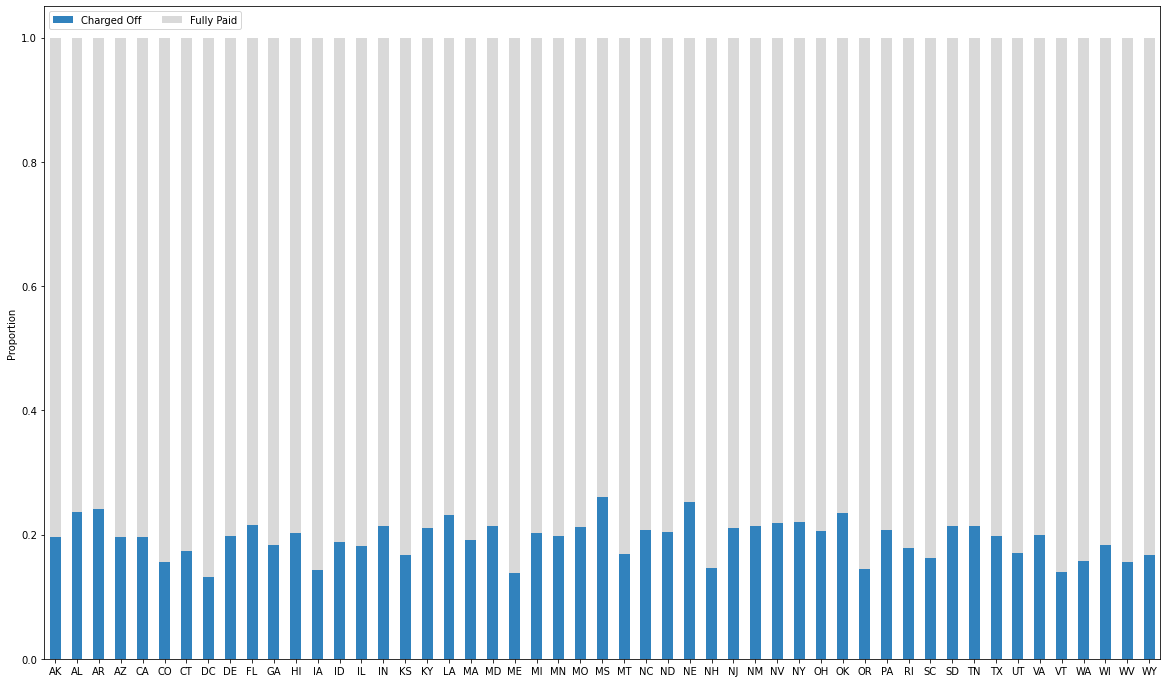

In [12]:
ct7 = pd.crosstab(index = data["addr_state"], columns = data["loan_status"])
ctp7 = pd.crosstab(index = data["addr_state"],columns = data["loan_status"], normalize = "index")
crosstable_visual_notext(ct7,ctp7)

#### initial_list_status vs loan_status

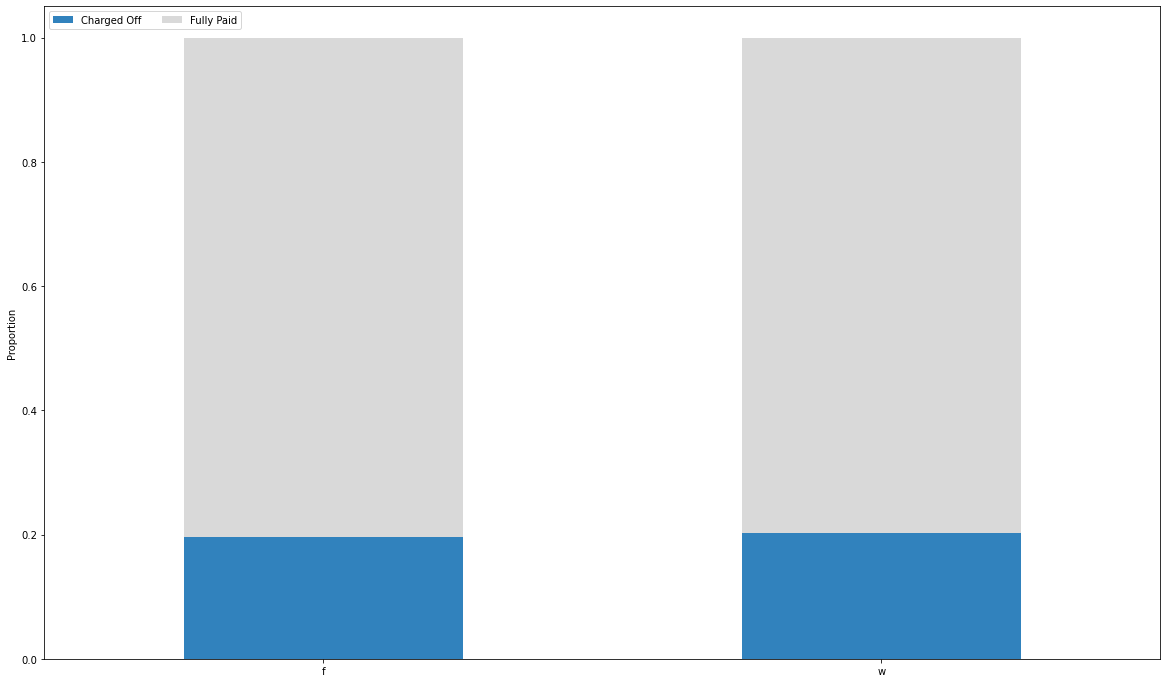

In [13]:
ct8 = pd.crosstab(index = data["initial_list_status"], columns = data["loan_status"])
ctp8 = pd.crosstab(index = data["initial_list_status"],columns = data["loan_status"], normalize = "index")
crosstable_visual_notext(ct8,ctp8)

#### application_type vs loan_status

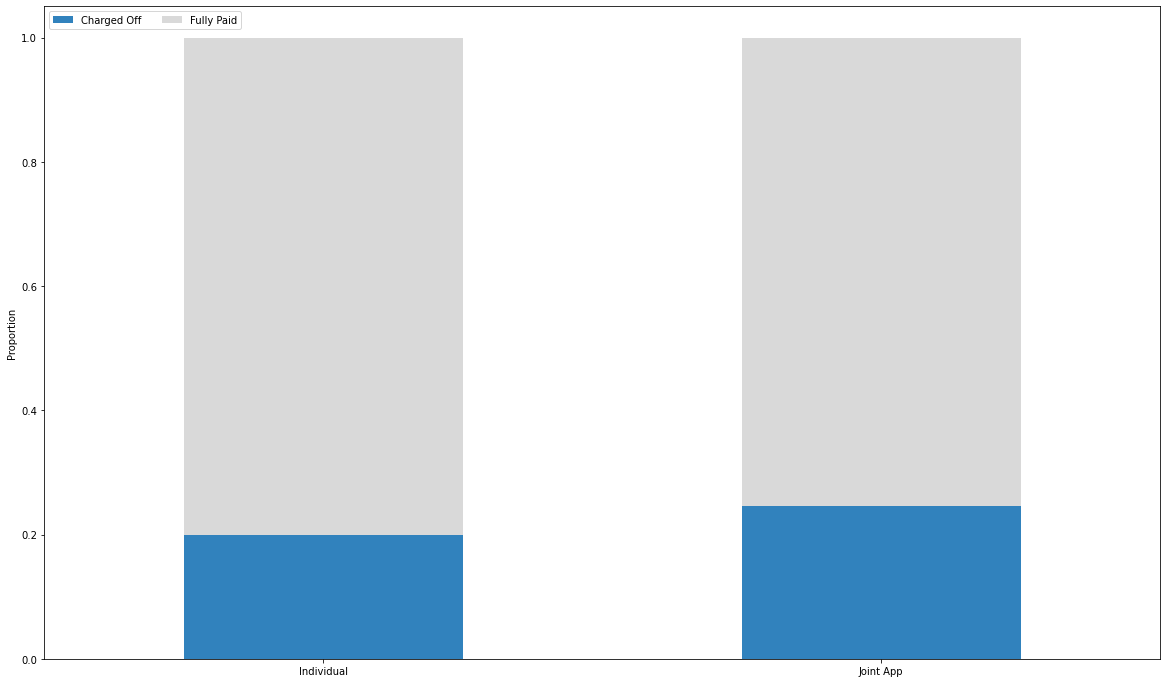

In [14]:
ct9 = pd.crosstab(index = data["application_type"], columns = data["loan_status"])
ctp9 = pd.crosstab(index = data["application_type"],columns = data["loan_status"], normalize = "index")
crosstable_visual_notext(ct9,ctp9)

### Group histograms for numerical features and target

#### * loan_amnt vs loan_status

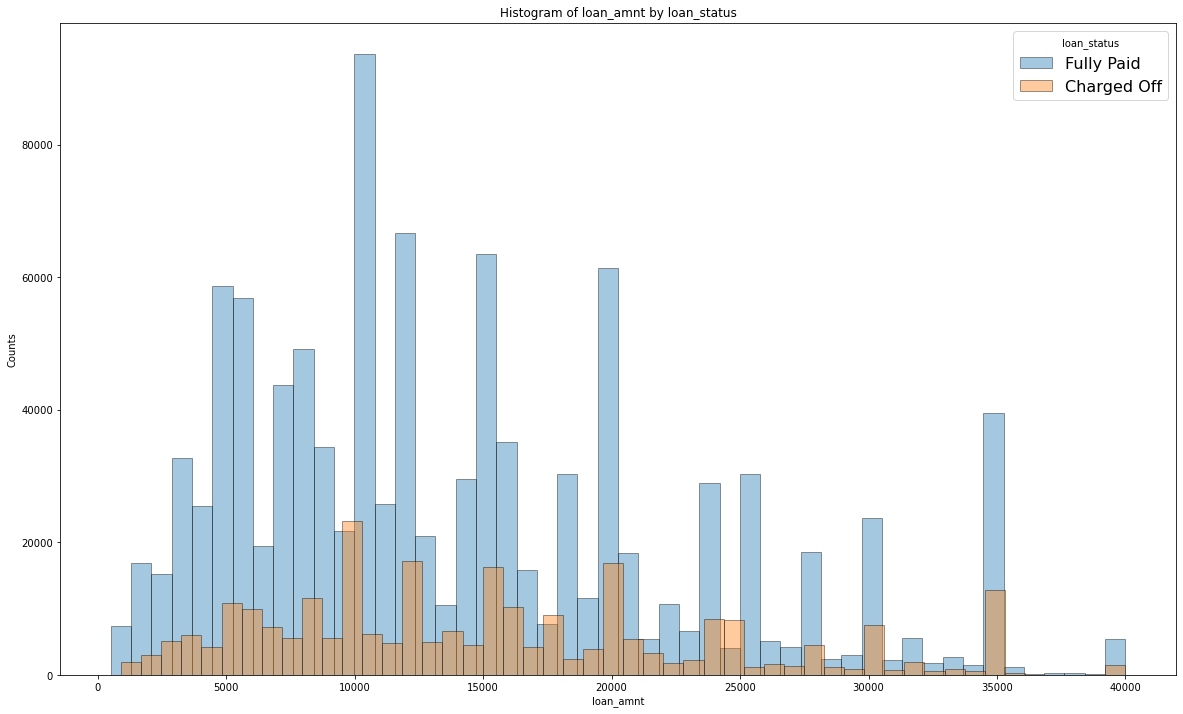

In [70]:
group_histograms(data, "loan_amnt","loan_status")

#### * int_rate vs loan_status

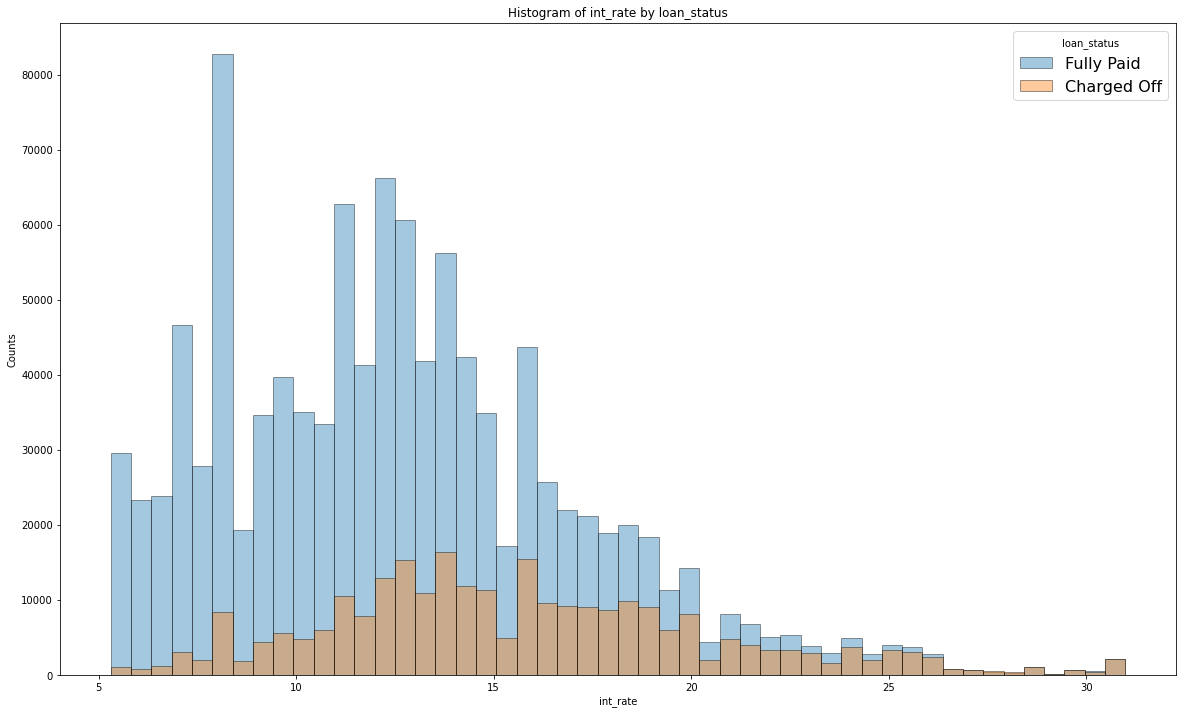

In [69]:
group_histograms(data, "int_rate", "loan_status")

In [ ]:
num_cols = ["loan_amnt","int_rate","installment","annual_inc","dti","open_acc","pub_rec","revol_util","total_acc",
            "mort_acc","pub_rec_bankruptcies","last_fico_range_low","last_fico_range_high"]

#### * installment vs loan_status

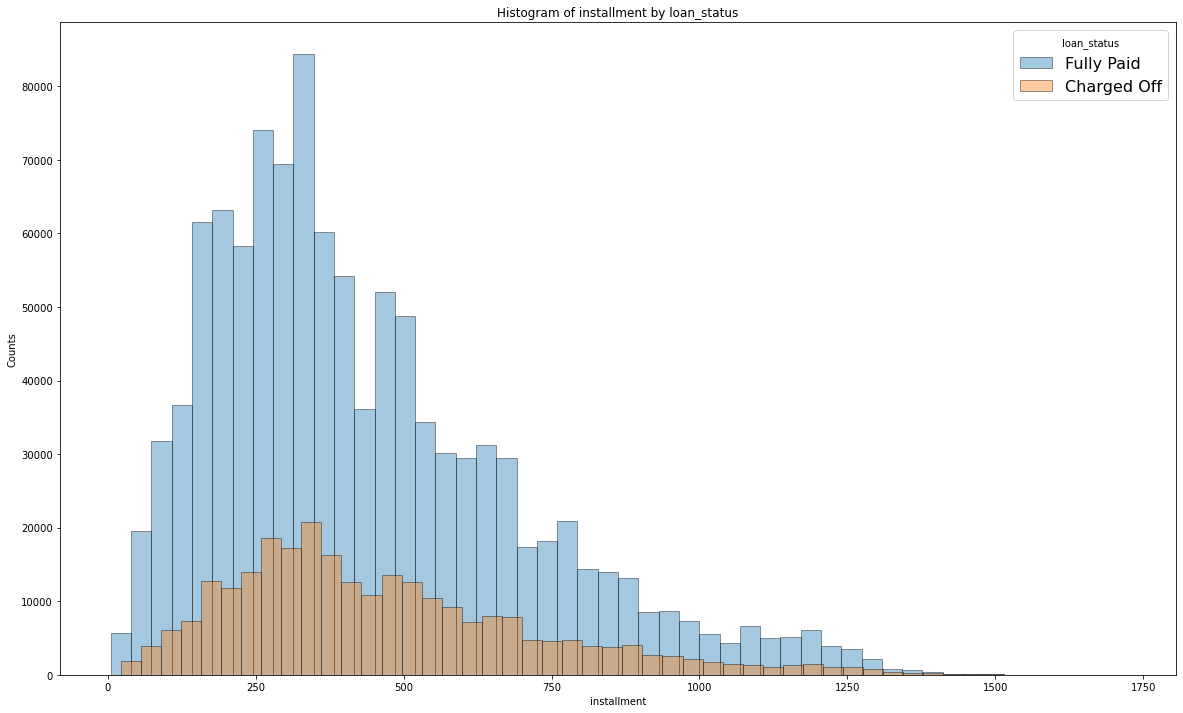

In [71]:
group_histograms(data, "installment","loan_status")

#### * annual_inc vs loan_status

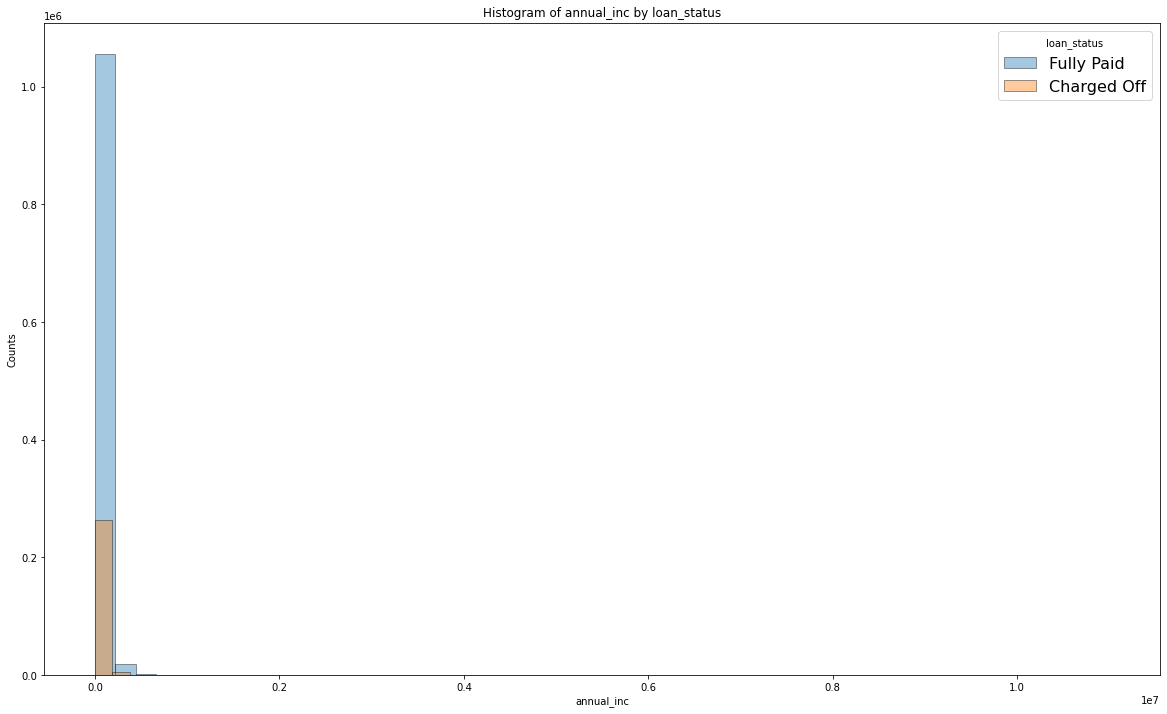

In [72]:
group_histograms(data, "annual_inc","loan_status")

annual income has outliers, let's focus on the 95% annual_inc